# Load model, parameters, performance metrics

In [44]:
import os
import torch
import argparse
from models.vqvae import VQVAE
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torchvision.utils import make_grid
import numpy as np

%matplotlib inline
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

"""
Utility functions
"""

def load_model(model_filename):
    path = os.getcwd() + '/results/'
    
    data = torch.load(path + model_filename)
    
    params = data["hyperparameters"]
    
    model = VQVAE(params['n_hiddens'], params['n_residual_hiddens'],
                  params['n_residual_layers'], params['n_embeddings'], 
                  params['embedding_dim'], params['beta']).to(device)

    model.load_state_dict(data['model'])
    
    return model, data

from scipy.signal import savgol_filter

def plot_metrics(data):
    results = data["results"]
    recon_errors = savgol_filter(results["recon_errors"], 19, 5)
    perplexities = savgol_filter(results["perplexities"], 19, 5)
    loss_vals = savgol_filter(results["loss_vals"], 19, 5)


    f = plt.figure(figsize=(16,4))
    ax = f.add_subplot(1,3,2)
    ax.plot(recon_errors)
    ax.set_yscale('log')
    ax.set_title('Reconstruction Error')
    ax.set_xlabel('iteration')

    ax = f.add_subplot(1,3,3)
    ax.plot(perplexities)
    ax.set_title('Average codebook usage (perplexity).')
    ax.set_xlabel('iteration')

    ax = f.add_subplot(1,3,1)
    ax.plot(loss_vals)
    ax.set_yscale('log')
    ax.set_title('Overall Loss')
    ax.set_xlabel('iteration')
    
def display_image_grid(x):
    x = make_grid(x_val_recon.cpu().detach()+0.5)
    x = x.numpy()
    fig = plt.imshow(np.transpose(x, (1,2,0)), interpolation='nearest')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    
def reconstruct(data_loader,model):
    (x, _) = next(iter(data_loader))
    x = x.to(device)
    vq_encoder_output = model.pre_quantization_conv(model.encoder(x))
    _, x_quant, _, _ = model.vector_quantization(vq_encoder_output)
    x_recon = model.decoder(x_quant)
    return x,x_recon, x_quant

"""
End of utilities
"""

model_filename = 'vqvae_data_block_ne_16_eh_16.pth'

model,vqvae_data = load_model(model_filename)


# Load dataset and loaders

In [38]:
import utils
training_data, validation_data, training_loader, validation_loader, x_train_var = utils.load_data_and_data_loaders('BLOCK', 32)

Loading block data
Done loading block data
Loading block data
Done loading block data


# Reconstruct validation data

In [39]:
x_val,x_val_recon,_ = reconstruct(validation_loader,model)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


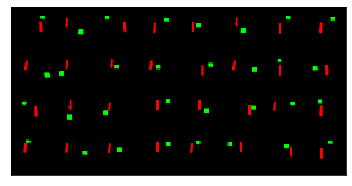

In [40]:
display_image_grid(x_val)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


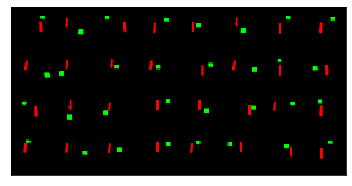

In [41]:
display_image_grid(x_val_recon)


# Smoothed Loss and Perplexity Values

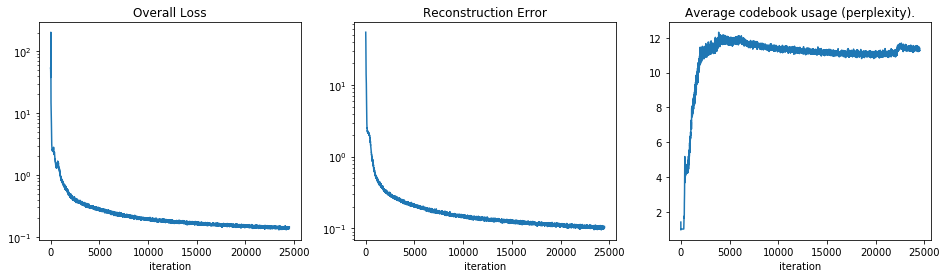

In [43]:
plot_metrics(vqvae_data)

In [45]:
x_val,x_val_recon,x_quant = reconstruct(validation_loader,model)

In [54]:
x_quant[0,:,0,0]

tensor([ 0.0496,  0.0985, -0.2221,  0.5603, -0.9335, -0.4933, -0.4957,  0.7952,
        -0.9389,  0.6369,  0.1111,  0.6469,  0.9147, -0.1786,  0.7576, -0.1609],
       device='cuda:0', grad_fn=<SelectBackward>)